In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_excel("smsspamcollection.xlsx")

In [3]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,9.0
1,ham,Ok lar... Joking wif u oni...,29.0,6.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,6.0
3,ham,U dun say so early hor... U c already then say...,49.0,6.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,2.0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160.0,8.0
5568,ham,Will ü b going to esplanade fr home?,36.0,1.0
5569,ham,"Pity, * was in mood for that. So...any other s...",57.0,7.0
5570,ham,The guy did some bitching but I acted like i'd...,125.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    5572 non-null   object 
 1   message  5572 non-null   object 
 2   length   5572 non-null   float64
 3   punct    5572 non-null   float64
dtypes: float64(2), object(2)
memory usage: 174.2+ KB


# Insights
Total columns=4

Total rows=5572

No null values are present.

No need to change data type of any column. 

In [5]:
df.head()   #print first five records

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,9.0
1,ham,Ok lar... Joking wif u oni...,29.0,6.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,6.0
3,ham,U dun say so early hor... U c already then say...,49.0,6.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,2.0


In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
#differnce is huge between ham and spam count so dataset is imbalance

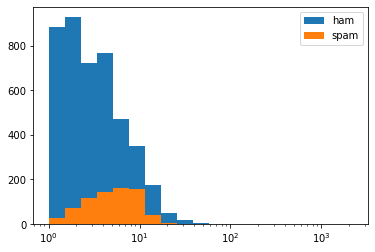

In [9]:
plt.xscale("log")
bins=1.5**np.arange(0,20)
plt.hist(df[(df["label"]=="ham")]["punct"],bins=bins)
plt.hist(df[(df["label"]=="spam")]["punct"],bins=bins)
plt.legend(["ham","spam"])

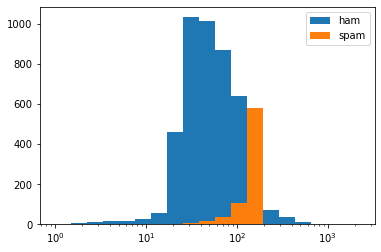

In [10]:
plt.xscale("log")
bins=1.5**np.arange(0,20)
plt.hist(df[(df["label"]=="ham")]["length"],bins=bins)
plt.hist(df[(df["label"]=="spam")]["length"],bins=bins)
plt.legend(["ham","spam"])

# Word Cloud
It help us to understand what is the most frequently occuring word in the doc/text.

In [11]:
!pip install Wordcloud

(-0.5, 999.5, 699.5, -0.5)

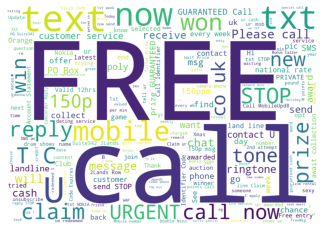

In [12]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=700,background_color="white")
wc.generate(" ".join(df[df["label"]=="spam"]["message"]))
plt.imshow(wc)
plt.axis("off")

In [13]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
temp=[]
ind=[]
for i in df["message"]:
    if type(i)==float:
        ind.append(df[df["message"]==i].index)
        temp.append(" ")
    if type(i)==str:
        i=i.lower()
        
        token=word_tokenize(i)
        
        ftoken=[t for t in token if(t.isalpha())]
        
        stop=stopwords.words("english")
        
        ctoken=[t for t in ftoken if(t not in stop)]
        
        lemma=WordNetLemmatizer()
        ltoken=[lemma.lemmatize(x) for x in ctoken]
        
        temp.append(" ".join(ltoken))

In [15]:
len(temp)

5572

In [16]:
len(ind)

1

In [17]:
print(temp)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think go usf life around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aid patent', 'per request melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune', 'winner valued network customer selected receivea prize reward claim call claim code valid hour', 'mobile month u r entitled update latest colour mobile camera free call mobile update co free', 'gon na home soon want talk stuff anymore tonight k cried enough today', 'six chance win cash pound txt send cost tsandcs apply reply hl info', 'urgent week free membership prize jackpot txt word claim c lccltd pobox', 'searching right word thank breather promise wont take h

In [18]:
len(df)

5572

In [19]:
ind

[Int64Index([1612], dtype='int64')]

In [20]:
df["message"][1612]

645.0

In [21]:
df["message"]=temp

In [22]:
df.drop(index=1612)

,label,message,length,punct
0,ham,go jurong point crazy available bugis n great ...,111.0,9.0
1,ham,ok lar joking wif u oni,29.0,6.0
2,spam,free entry wkly comp win fa cup final tkts may...,155.0,6.0
3,ham,u dun say early hor u c already say,49.0,6.0
4,ham,nah think go usf life around though,61.0,2.0
...,...,...,...,...
5567,spam,time tried contact u pound prize claim easy ca...,160.0,8.0
5568,ham,ü b going esplanade fr home,36.0,1.0
5569,ham,pity mood suggestion,57.0,7.0
5570,ham,guy bitching acted like interested buying some...,125.0,1.0


In [23]:
x=df["message"]
y=df["label"]

In [24]:
#Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(x)

In [25]:
x

<5572x6688 sparse matrix of type '<class 'numpy.int64'>'
	with 42700 stored elements in Compressed Sparse Row format>

In [26]:
X=x.toarray()

In [27]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
x_df=pd.DataFrame(X,columns=cv.get_feature_names())

In [29]:
x_df.shape

(5572, 6688)

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_df,y,random_state=1,test_size=0.3)

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
ypred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1442
        spam       0.96      0.85      0.90       230

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1442
        spam       1.00      0.77      0.87       230

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=svc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1442
        spam       1.00      0.77      0.87       230

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.93      1672
weighted avg       0.97      0.97      0.97      1672



              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1442
        spam       1.00      0.77      0.87       230

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.93      1672
weighted avg       0.97      0.97      0.97      1672



              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1442
        spam       1.00      0.77      0.87       230

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.93      1672
weighted avg       0.97      0.97      0.97      1672

